# MAP654I - Practical introduction to Machine Learning

### Practical Session 1 - Unsupervised Leaning

***

#### Importing libraries

In [1]:
import numpy as np
import pylab as pl
import scipy as sp

***

### 1.3 - Loading the data

#### Temperature dataset

In [2]:
temper = np.load('temper.npz')

In [3]:
for item in temper:
    print(item)

villes
data
varname


The file temper.npz contains 3 lists of data, we can store them in variables.

In [4]:
raw_data              = temper['data']
x1                    = temper['data'][:,:-2]
villes                = temper['villes']
locations_coordinates = temper['data'][:,-2:]  # latitude / Longitude
varname               = temper['varname']

In [5]:
print(villes)

['Bordeaux' 'Brest' 'Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon'
 'Marseille' 'Montpellier' 'Nantes' 'Nice' 'Paris' 'Rennes' 'Strasbourg'
 'Toulouse' 'Vichy']


Here there is the list of the differents cities contained in the dataset. 

We can print the datas for one particular city in order to better understand the dataset :

In [6]:
index = 4

print(villes[index] + ' : ') 
for elt in zip(varname, raw_data[index,:]):
    print('   - ', elt)

Lille : 
   -  ('January', 2.4)
   -  ('February', 2.9)
   -  ('March', 6.0)
   -  ('April', 8.9)
   -  ('May', 12.4)
   -  ('June', 15.3)
   -  ('July', 17.1)
   -  ('August', 17.1)
   -  ('September', 14.7)
   -  ('October', 10.4)
   -  ('November', 6.1)
   -  ('December', 3.5)
   -  ('Latitude', 50.4)
   -  ('Longitude', 3.04)


For each month we see the corresponding average temperature value. Two last values are the latitude and the longitude of the corresponding city.

We can plot the mean temperature of each city calculated on one year (all the dataset informations) : 

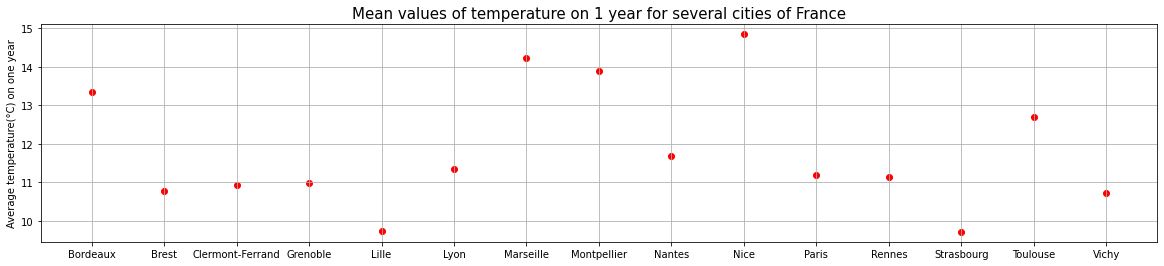

In [7]:
fig = pl.figure(1, figsize=(20, 4))
pl.scatter(villes,np.mean(x1, axis=1), c='r')
pl.title("Mean values of temperature on 1 year for several cities of France",fontsize=15)
pl.ylabel("Average temperature(°C) on one year")
pl.grid()

This plot shows us that the coldest cities (on average on one year) are Lille and Stasbourg. They seem to be ex aequo. In the opposite, Nice seems to be the hotest city of the dataset with an average temperature of 15°C.

We can also note that the cities in the dataset are quite diversified (in terms of temperature).  

In order to have more informations, we can use a boxplot representation.

Text(0, 0.5, 'Temperature(°C) on one year')

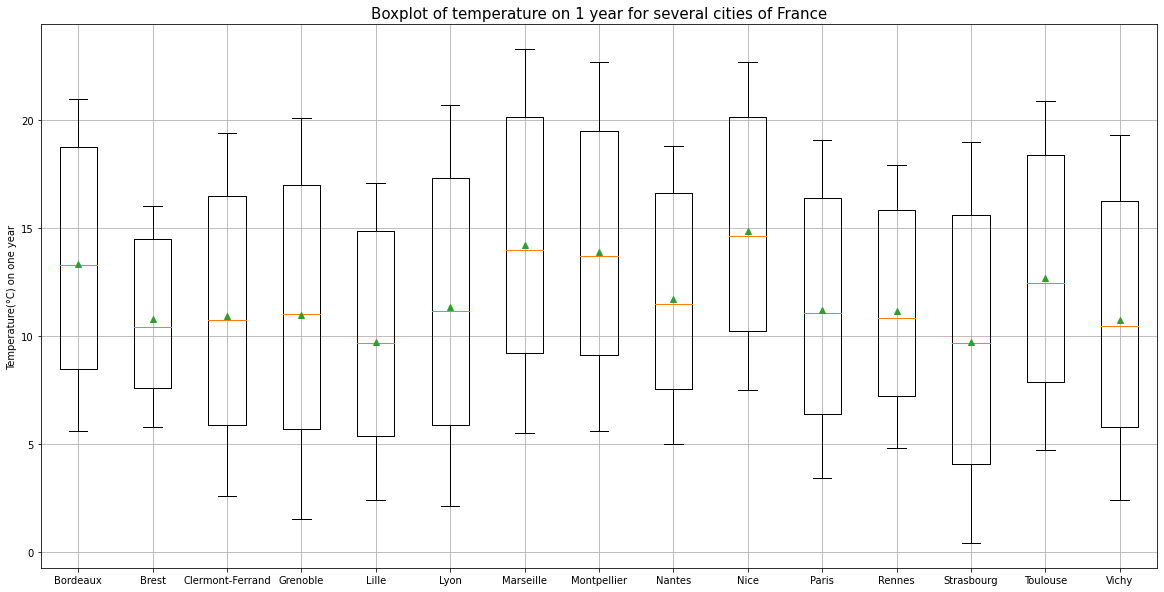

In [8]:
fig = pl.figure(1, figsize=(20, 10))
temperature_boxplot = pl.boxplot(x1.T,showmeans=True)
boxplot_label = pl.xticks([i+1 for i in range(len(villes))],villes)
pl.grid()
pl.title("Boxplot of temperature on 1 year for several cities of France",fontsize=15)
pl.ylabel("Temperature(°C) on one year")

Here, there is a lot to say. 

Firstly, for all the cities, means and medians are approximately equals. We can interpret that 
by saying that there is no outliers in the dataset. the outliers could have come from :

- broken sensor
- a few days in the year with really abnormal temperatures (heat wave)
   
But the datas contained in the dataset are also means over months. so the outliers could have been erased when calculating this average.

What could be also interesting is to look at the inter-quartile range, It's to say the range between the lowest and the highest temperatures. Brest has a small interquartile range, perhaps the sea makes the climate milder. We suppose Lyon has the largest interquartile range. Interquartile range seems to be an important informations to qualify a climate. 

I then reproduced the figures contained in the lab sheet.

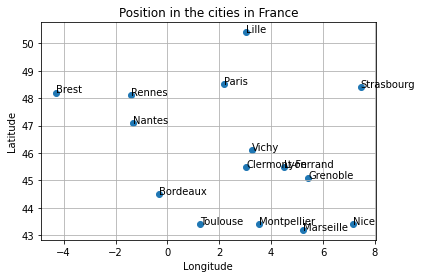

In [9]:
pl.scatter(locations_coordinates[:,1], locations_coordinates[:,0])

pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position in the cities in France",fontsize=12)
pl.grid()
for i, label in enumerate(villes):
    pl.annotate(label, (locations_coordinates[i,1], locations_coordinates[i,0]))

As we said earlier, we can see that the cities are spread all over the territory. we had noticed that thanks to the diversification of the average temperatures but we can also notice it thanks to the geographical positions.

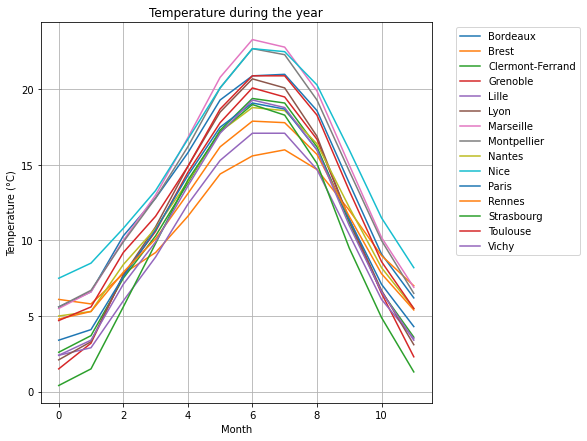

In [10]:
fig = pl.figure(1, figsize=(7, 7))
for i in range(len(villes)):
    pl.plot(x1[i], label=villes[i])

pl.xlabel("Month")
pl.ylabel("Temperature (°C)")
pl.title("Temperature during the year",fontsize=12)
pl.legend(bbox_to_anchor=(1.05, 1))
pl.grid()

On this plot, we can distinguish the seasons with low temperatures in winter and high in summer. For all the cities, the temperatures follow approximativly the same distribution, this is the mean of the temperature during one year that is changing. Variance is also changing depending on the city.

#### Digits dataset

In [11]:
digits = np.load('digits.npz')

In [12]:
for item in digits:
    print(item, '/ Shape :',digits[item].shape)

xt / Shape : (1500, 784)
yt / Shape : (1500, 1)
y / Shape : (3000, 1)
x / Shape : (3000, 784)


There are 4 arrays in the digit dataset. Indeed, There are labels and samples for train and test. I stored them in variables and I normalized the data matrices :

In [13]:
x  = digits['x'] / 255
xt = digits['xt'] / 255
y  = digits['y'] 
yt = digits['yt']

For this lab, I will not use xt and yt since it is on unsupervised learning. 

We can visualize one random image of the test dataset :

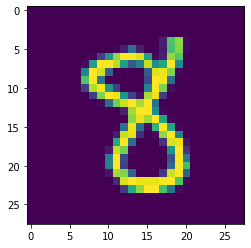

In [14]:
pl.imshow(x[2553,:].reshape(28,28))

We can recognize a number. 

In [15]:
np.unique(y, return_counts=True)

(array([1, 7, 8], dtype=uint8), array([1000, 1000, 1000]))

There are three classes of numbers in the dataset : 1, 7 and 8. There are 1000 samples for each classes. 

***

### 2 - Clustering

In [16]:
from sklearn.cluster import KMeans

#### 2.1 - For both datasets

We apply K -Means clustering on both datasets. 

##### Temperature dataset

Firstly we test with K = 3.

In [17]:
clf_temperature        = KMeans(3)
y_kmeas_temperature    = clf_temperature.fit_predict(x1)  # predicted clusters
dist_kmeas_temperature = clf_temperature.transform(x1)    # distance from clusters
C_kmeas_temperature    = clf_temperature.cluster_centers_ # clusters centroids

We can plot the centroids on the earlier figure : 

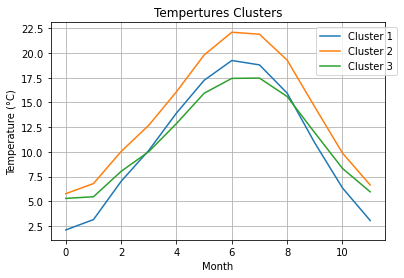

In [18]:
for i in range(3):
    pl.plot(C_kmeas_temperature[i], label=('Cluster ' + str(i + 1)))

pl.xlabel("Month")
pl.ylabel("Temperature (°C)")
pl.title("Tempertures Clusters",fontsize=12)
pl.legend(bbox_to_anchor=(1.05, 1))
pl.grid()

We can visualize the three clusters thanks to this graph. We can sat that:
- The clusters are well separated
- The second cluster represents the cities with the highest temperatures (maybe the southern cities)
- Cluters 1 and 3 are more alike
- The third cluster represents the cities where it is cold in winter and hot in summer, It's to say the cities where the distribution of the temperatures along the year have a great variance or a great interquartile range (maybe cities from the center of France away from the sea)
- The first cluster represent cities where the climate is milder all year round (small variance or small interquartile range). This may correspond to towns close to the sea in Brittany where the climate is very mild.

For the moment, these are only interpretations, we cannot be sure at this stage. We will go further in the analyzes.

We can now plot the same graph for different values of K.

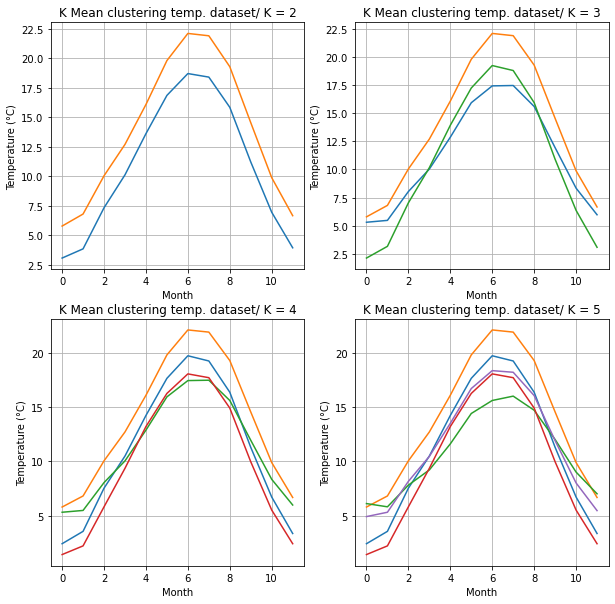

In [19]:
figure, axis = pl.subplots(2, 2,figsize=(10,10)) 
            
K = 2
for axe in axis:
    for figure in axe:
        clf_temperature        = KMeans(K)
        y_kmeas_temperature    = clf_temperature.fit_predict(x1)
        C_kmeas_temperature    = clf_temperature.cluster_centers_
        figure.set_title('K Mean clustering temp. dataset/ K = {}'.format(K))
        figure.set_xlabel("Month")
        figure.set_ylabel("Temperature (°C)")
        figure.grid()
        for i in range(K):
            figure.plot(C_kmeas_temperature[i])
        K += 1

Analysis :

- k = 2 : Two clusters for hotest temperatures and coldest temperatures.
- k = 3 : We add an informations witth the milder climats.
- K = 4 : Curves start to overlap. The information of one cluster is found in an other. We do not gain information by going from K = 3 to K = 4.
- K = 5 : The curves still overlap.

Maybe K = 3 is the best choice for this dataset. After K = 3, the clusters are overlapping. But it is difficult to choose K just by anylizing this graphs, We can use the Elbow method to choose it.

<function matplotlib.pyplot.show(close=None, block=None)>

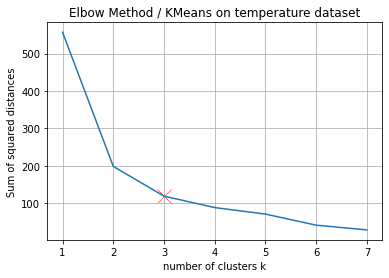

In [20]:
sum_squared_dist = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(x1)
    sum_squared_dist.append(km.inertia_)
pl.plot(K, sum_squared_dist)
pl.scatter(3, sum_squared_dist[2],marker='x', color='red',s=200, lw=0.5)
pl.grid()
pl.title('Elbow Method / KMeans on temperature dataset')
pl.xlabel('number of clusters k')
pl.ylabel('Sum of squared distances')
pl.show

Thanks to the Elbow methods, we should take K = 3. 

##### Climats in France

I know very little about the different climates in France. So I decided to go do some research on the internet.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.meteocontact.fr%2Fuploads%2Fclimatologie%2Fcartes%2Fclimatsfrance.png&f=1&nofb=1" width="500"/>

The climates in France are numerous, mountainous, oceanic, Mediterranean and others. According to several websites, we can count 5 different climates in France but other websites are finding more of them.

So I wondered why we find 3 clusters in our dataset. I found these answers which can partly explain this:

- Our dataset is quite small:
    - 15 cities compared to $550 \; 000 km^2$ of land area. 
    - Temperatures may be out of whack due to pollution and activity. 
    - Locations in the countryside would have been a good solution to analyze the climates of France.
    - 12 months / 1 year is two short.
    
- Climats are not only qulified by temperatures:
    - Humidity, Rain, Sunshine and many others.

In conlusion, it is not a problem to keep K = 3 for this dataset. 

We keep the value K = 3 :

In [21]:
clf_temperature        = KMeans(3)
y_kmeas_temperature    = clf_temperature.fit_predict(x1)
dist_kmeas_temperature = clf_temperature.transform(x1)
C_kmeas_temperature    = clf_temperature.cluster_centers_

##### Digits dataset

we apply the K-Means algorithm on the digits dataset with K = 3:

In [22]:
clf_digits        = KMeans(3)
y_kmeas_digits    = clf_digits.fit_predict(x)
dist_kmeas_digits = clf_digits.transform(x)
C_kmeas_digits    = clf_digits.cluster_centers_

In [23]:
np.unique(y, return_counts=1)

(array([1, 7, 8], dtype=uint8), array([1000, 1000, 1000]))

The original dataset is composed of pictures with 1, 7 and 8.

In [24]:
np.unique(y_kmeas_digits, return_counts=1)

(array([0, 1, 2], dtype=int32), array([ 846,  918, 1236]))

The K-Means algorithm returns clusters labelled by numbers from 0 to 2. 

In [25]:
C_kmeas_digits.shape

(3, 784)

Since we ran the algorithm with K = 3, we have 3 cluster centers that we can plot with the imshow function:

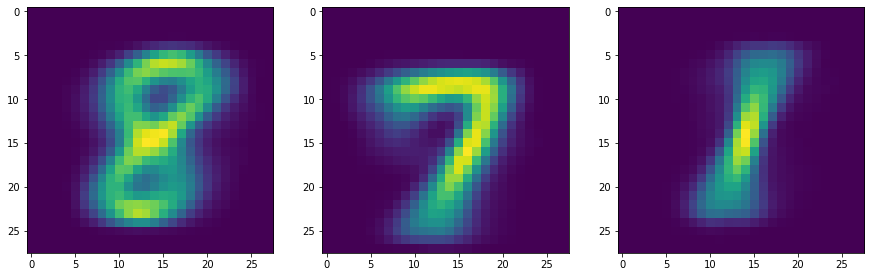

In [26]:
figure, axis = pl.subplots(1, 3, figsize=(15,5)) 
axis[0].imshow(C_kmeas_digits[0,:].reshape(28,28))
axis[1].imshow(C_kmeas_digits[1,:].reshape(28,28))
axis[2].imshow(C_kmeas_digits[2,:].reshape(28,28))

We can recognize the three original numbers : 1, 7 and 8. The result of the K-Means algorithm on this dataset is quite impressive because we can clearly visualize the output of the algorithm. 

We can test we other values of K:

##### K = 2

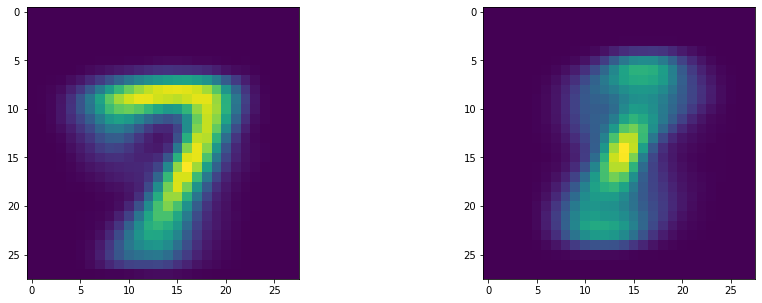

In [27]:
clf_digits        = KMeans(2)
y_kmeas_digits    = clf_digits.fit_predict(x)
C_kmeas_digits    = clf_digits.cluster_centers_

figure, axis = pl.subplots(1, 2, figsize=(15,5)) 
axis[0].imshow(C_kmeas_digits[0,:].reshape(28,28))
axis[1].imshow(C_kmeas_digits[1,:].reshape(28,28))

With K = 2, The 7 is well clustered. The 1 and the 8 seem to be placed in the same cluster. K = 2 is not a good value for what we want. 

##### K = 4

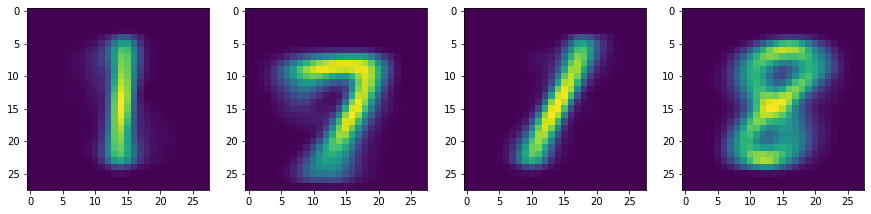

In [28]:
clf_digits        = KMeans(4)
y_kmeas_digits    = clf_digits.fit_predict(x)
C_kmeas_digits    = clf_digits.cluster_centers_

figure, axis = pl.subplots(1, 4, figsize=(15,5)) 
axis[0].imshow(C_kmeas_digits[0,:].reshape(28,28))
axis[1].imshow(C_kmeas_digits[1,:].reshape(28,28))
axis[2].imshow(C_kmeas_digits[2,:].reshape(28,28))
axis[3].imshow(C_kmeas_digits[3,:].reshape(28,28))

Here, with K = 4, 7 and 8 are well clustered. 1 is divided in two clusters. There is a cluster with a vertical 1 and a cluster with a 1 with a little angle. With K > 3, the algorithm finds differences on pre-existing classes. It will find writing variants of the numbers 1, 7 and 8. it is therefore not relevant for this case to choose K = 4.

For this dataset, it is simplest to choose the value of K than for the temperature dataset. Indeed, we already know the number of clusters we want (thanks to the value of y). The most relevant value of K is 3 in this case. 

We keep the value K = 3 :

In [29]:
clf_digits        = KMeans(3)
y_kmeas_digits    = clf_digits.fit_predict(x)
dist_kmeas_digits = clf_digits.transform(x)
C_kmeas_digits    = clf_digits.cluster_centers_

#### 2.2 - Temperature dataset

Here is the list of the cities with there clusters:

In [30]:
sorted(zip(y_kmeas_temperature,villes))

[(0, 'Clermont-Ferrand'),
 (0, 'Grenoble'),
 (0, 'Lille'),
 (0, 'Lyon'),
 (0, 'Paris'),
 (0, 'Strasbourg'),
 (0, 'Vichy'),
 (1, 'Bordeaux'),
 (1, 'Marseille'),
 (1, 'Montpellier'),
 (1, 'Nice'),
 (1, 'Toulouse'),
 (2, 'Brest'),
 (2, 'Nantes'),
 (2, 'Rennes')]

The first cluster seems to give cities of the north west, near and in Britanny. 
The second cluster is composed of cities without and away from the sea, center and east of France.
The third cluster is composed of cities from south of the France

At a first view, the clusters seem to make sens, the cities are grouped geographicaly. 

We can plot the cities with there locations:

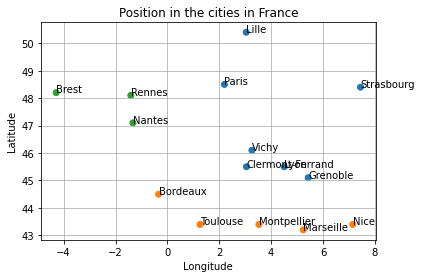

In [31]:
pl.scatter(locations_coordinates[:,1], locations_coordinates[:,0], c=y_kmeas_temperature, cmap='tab10',vmax=9)
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position in the cities in France",fontsize=12)
pl.grid()
for i, label in enumerate(villes):
    pl.annotate(label, (locations_coordinates[i,1], locations_coordinates[i,0]))

We find again what we told before. 
- In the south, the climate is hot.
- Brest, Rennes and Nantes are cities near from the sea, the climate is mild. 
- Cities that are away from the sea have a different climate. 

Of course, it exists specificity for each cities. For exemple, I know that the temperature in Grenoble can be very special because the city is surrounded by mountains. So in general, the clustering makes sense.

#### 2.3 - digits dataset

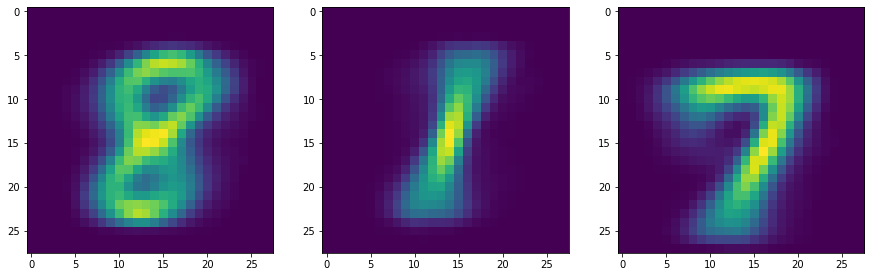

In [32]:
figure, axis = pl.subplots(1, 3, figsize=(15,5)) 
axis[0].imshow(C_kmeas_digits[0,:].reshape(28,28))
axis[1].imshow(C_kmeas_digits[1,:].reshape(28,28))
axis[2].imshow(C_kmeas_digits[2,:].reshape(28,28))

It looks like the centroids are real images but they are not. Indeed, K-Means algorithm calculates the centroids positions by making means on the original samples (Here by making means on the values of the pixels). We can visualize it by saying that the outlines of the numbers are blurry.

It exists a variant of the K-Means algorithm where the centroids are points of the original dataset. The name of the algorithm is K-medoids.

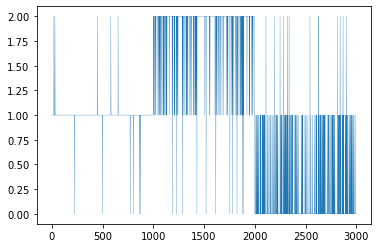

In [33]:
pl.plot(y_kmeas_digits, lw=0.3)
np.unique(y_kmeas_digits)
pl.show()

We can see horizontal straigth lines each 1000 samples. A clustering respecting the true classe is piecewise constant. We can directly compute the following scores functions:

In [34]:
from sklearn.metrics import rand_score

RI = (number of agreeing pairs) / (number of pairs)

In [35]:
rand_score(np.reshape(y,(3000)), y_kmeas_digits)

0.8820057797043459

1 corresponds to a perfect match. 88% of the samples are well classed.

In [36]:
from sklearn.metrics import adjusted_rand_score

ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

In [37]:
adjusted_rand_score(np.reshape(y,(3000)), y_kmeas_digits)

0.7362900422895274

The Adjusted rand score can be a better quality measure, It forces to have a value close to 0 if the corresponding sample is not well clustered.  

In [38]:
for K in range(2,7):
    clf_digits_test_score        = KMeans(K)
    y_kmeas_digit_test_score    = clf_digits_test_score.fit_predict(x)
    print('K = ',K, ' / RS = ', rand_score(np.reshape(y,(3000)), y_kmeas_digit_test_score), ' / ARS = ', adjusted_rand_score(np.reshape(y,(3000)), y_kmeas_digit_test_score))

K =  2  / RS =  0.6976861175947539  / ARS =  0.42155790084160727
K =  3  / RS =  0.8811712793153273  / ARS =  0.7344873296752322
K =  4  / RS =  0.862595087251306  / ARS =  0.6723976077928321
K =  5  / RS =  0.8263701233744581  / ARS =  0.5700637582067607
K =  6  / RS =  0.7991417139046348  / ARS =  0.48401108558934136


For both RS and ARS, K=3 has the best results.

***

### 3 - Density estimation

#### 3.1 - For both datasets

In [39]:
from sklearn.mixture import GaussianMixture

##### Temperature dataset

<div class="alert alert-block alert-info">
GMM on Temperature dataset
</div>

In [40]:
clf_GMM_temp = GaussianMixture(2, covariance_type="diag")
clf_GMM_temp.fit(x1)

yc_GMM_temp = clf_GMM_temp.predict(x1)

p_GMM_temps = np.exp(clf_GMM_temp.score_samples(x1))

# Get estimated parameters
phi_GMM_temps = clf_GMM_temp.weights_
mus_GMM_temps = clf_GMM_temp.means_
Sigmas_GMM_temps = clf_GMM_temp.covariances_

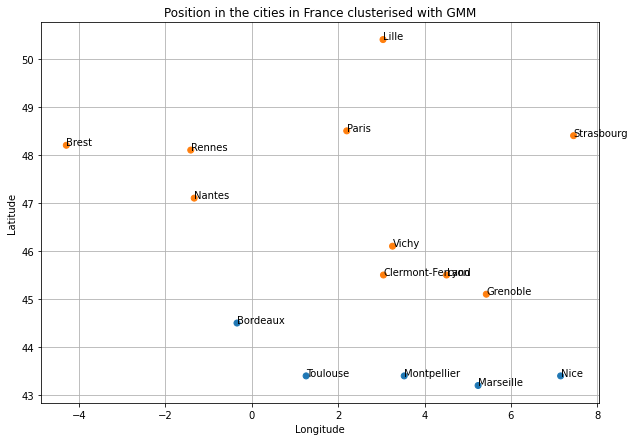

In [41]:
figure, axis = pl.subplots(1, figsize=(10,7)) 
pl.scatter(locations_coordinates[:,1], locations_coordinates[:,0], c=yc_GMM_temp, cmap='tab10',vmax=9)
pl.xlabel("Longitude")
pl.ylabel("Latitude")
pl.title("Position in the cities in France clusterised with GMM",fontsize=12)
pl.grid()
for i, label in enumerate(villes):
    pl.annotate(label, (locations_coordinates[i,1], locations_coordinates[i,0]))

If we want to geographically analyze the two clusters, we can approximativly say one cluster for north and one for south. Bu it is more complicated than that, In fact Grenoble is at the quasi same longitude as Bordeaux. But we can say that the 2 clusters found make sense. 

<div class="alert alert-block alert-info">
Plot of the two clusters found by GMM
</div>

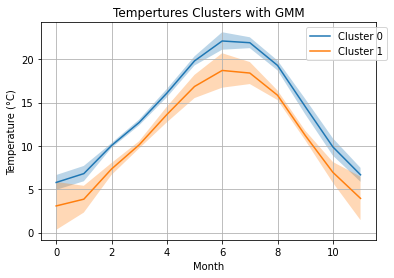

In [42]:
MONTHS = [month for month in range(12)]
for i in range(2):
    pl.plot(mus_GMM_temps[i],  label=('Cluster ' + str(i)))
    pl.fill_between(MONTHS, mus_GMM_temps[i] + Sigmas_GMM_temps[i],mus_GMM_temps[i] - Sigmas_GMM_temps[i], alpha=0.3)
    
pl.xlabel("Month")
pl.ylabel("Temperature (°C)")
pl.title("Tempertures Clusters with GMM",fontsize=12)
pl.legend(bbox_to_anchor=(1.05, 1))
pl.grid()

Mean analysis:

- One cluster (Orange curve) corresponds to cities with lower temperatures
- The other (Blue) corresponds to cities with higher temperatures in average over the year

Variance analysis:
- The variance that corresponds to the cluster with higher temperatures (Orange) is small all over the year. The cities in the cluster have temperature that follows the oranage curve without outliers temperatures. 
- The variance for the blue curve varies much more. The cluster is much more diversified. What qualifies the cities in this cluster is that on average over the year the temperatures are lower than in the other cluster. But a city of this cluster can have a very low temperature in winter and a very high temperature in summer compared to the other cities of the same cluster.

<div class="alert alert-block alert-info">
Test with several values of K
</div>

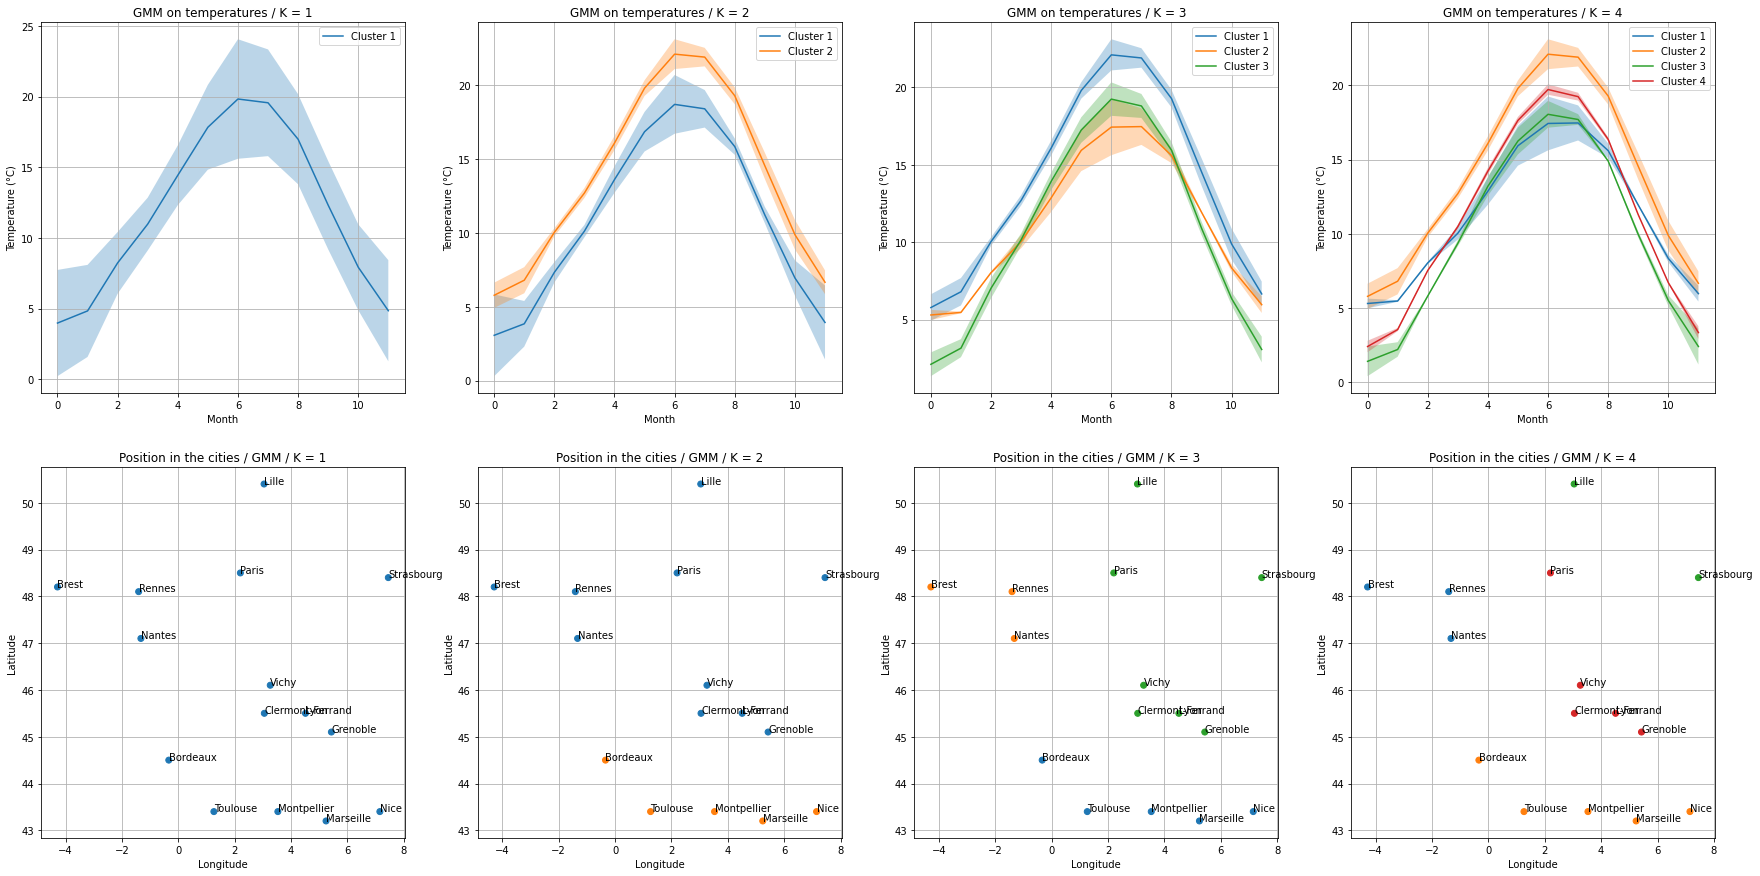

In [43]:
figure, axis = pl.subplots(2, 4, figsize=(30,15)) 
for K in range(1, 5):
    clf_GMM_temp_test_K = GaussianMixture(K, covariance_type="diag")
    clf_GMM_temp_test_K.fit(x1)
    yc_GMM_temp_test = clf_GMM_temp_test_K.predict(x1)
    phi_GMM_temps_test_K = clf_GMM_temp_test_K.weights_
    mus_GMM_temps_test_K = clf_GMM_temp_test_K.means_
    Sigmas_GMM_temps_test_K = clf_GMM_temp_test_K.covariances_
        
    for i in range(K):
        axis[0][K-1].plot(MONTHS, mus_GMM_temps_test_K[i],  label=('Cluster ' + str(i + 1)))
        axis[0][K-1].fill_between(MONTHS, mus_GMM_temps_test_K[i] + Sigmas_GMM_temps_test_K[i],mus_GMM_temps_test_K[i] - Sigmas_GMM_temps_test_K[i], alpha=0.3)

    axis[0][K-1].set_xlabel("Month")
    axis[0][K-1].set_ylabel("Temperature (°C)")
    axis[0][K-1].set_title("GMM on temperatures / K = {}".format(K),fontsize=12)
    axis[0][K-1].legend()
    axis[0][K-1].grid()
    
    axis[1][K-1].scatter(locations_coordinates[:,1], locations_coordinates[:,0], c=yc_GMM_temp_test, cmap='tab10',vmax=9)
    axis[1][K-1].set_xlabel("Longitude")
    axis[1][K-1].set_ylabel("Latitude")
    axis[1][K-1].set_title("Position in the cities / GMM / K = {}".format(K),fontsize=12)
    axis[1][K-1].grid()
    for i, label in enumerate(villes):
        axis[1][K-1].annotate(label, (locations_coordinates[i,1], locations_coordinates[i,0]))

- K=1 : Each cities are in the cluster. The curve is the average temperature found by the algorithm for all cities during the year. The variance is high because all cities are in the cluster.

---
- K=2 : One cluster corresponds to cities with a colder temperature than the other cluster. It seems to be a good value for K.

---

- K=3 : We notice that two clusters are almost the same as for K = 2. There is one cluster that appears with very low variance that corresponds to only two cities. These cities correspond to border cities which may explain why they are put in another cluster. However K=3 seems too high for such a small dataset.

---

- K=4 : Very low variance on two clusters. One of these clusters corresponds to a single city and the other to two cities. The value of K is too high.

---

<div class="alert alert-block alert-info">
Test with different covariance types
</div>

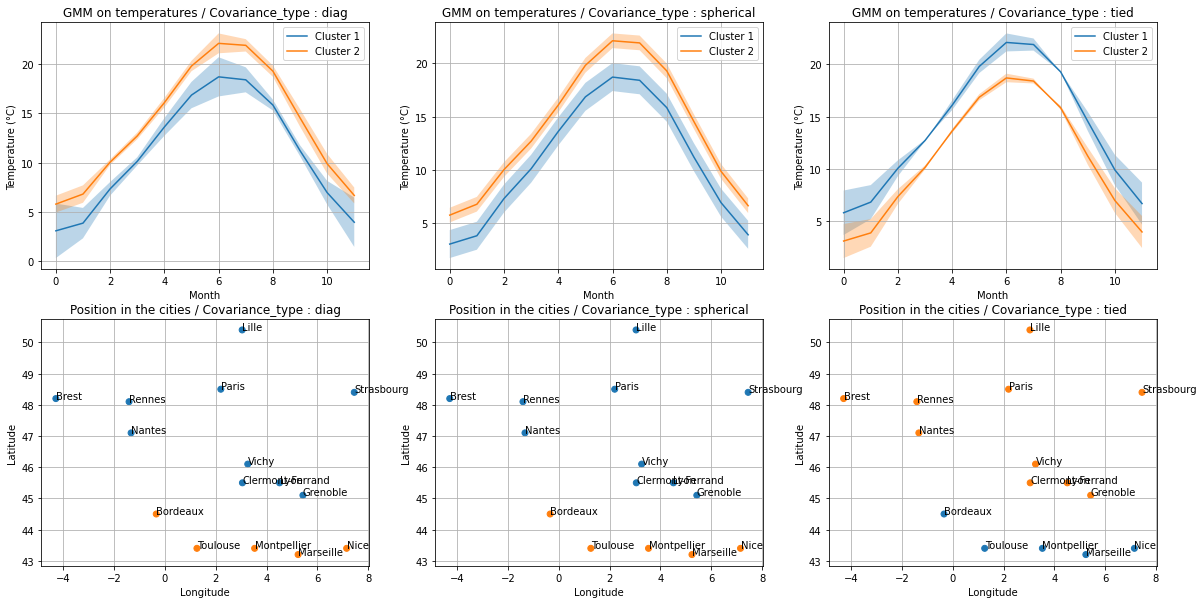

In [44]:
covariance_type = ['diag', 'spherical','tied']
figure, axis = pl.subplots(2, len(covariance_type), figsize=(20,10)) 
for i in range(len(covariance_type)):
    clf_GMM_temp_test_K = GaussianMixture(2, covariance_type=covariance_type[i])
    clf_GMM_temp_test_K.fit(x1)
    yc_GMM_temp_test = clf_GMM_temp_test_K.predict(x1)
    phi_GMM_temps_test_K = clf_GMM_temp_test_K.weights_
    mus_GMM_temps_test_K = clf_GMM_temp_test_K.means_
    Sigmas_GMM_temps_test_K = clf_GMM_temp_test_K.covariances_
        
    for j in range(2):
        axis[0][i].plot(MONTHS, mus_GMM_temps_test_K[j],  label=('Cluster ' + str(j + 1)))
        axis[0][i].fill_between(MONTHS, mus_GMM_temps_test_K[j] + Sigmas_GMM_temps_test_K[j],mus_GMM_temps_test_K[j] - Sigmas_GMM_temps_test_K[j], alpha=0.3)

    axis[0][i].set_xlabel("Month")
    axis[0][i].set_ylabel("Temperature (°C)")
    axis[0][i].set_title("GMM on temperatures / Covariance_type : {}".format(covariance_type[i]),fontsize=12)
    axis[0][i].legend()
    axis[0][i].grid()
    
    axis[1][i].scatter(locations_coordinates[:,1], locations_coordinates[:,0], c=yc_GMM_temp_test, cmap='tab10',vmax=9)
    axis[1][i].set_xlabel("Longitude")
    axis[1][i].set_ylabel("Latitude")
    axis[1][i].set_title("Position in the cities / Covariance_type : {}".format(covariance_type[i]),fontsize=12)
    axis[1][i].grid()
    for k, label in enumerate(villes):
        axis[1][i].annotate(label, (locations_coordinates[k,1], locations_coordinates[k,0]))

in this case the correspondence of the cities to their clusters does not change according to the type of covariance.

---

- diag : Clusters can take any ellipsoidal shape, but ellispoid axes must be parallel to the coordinate axes. In our case, If we could plot the covariance on the geographical graph, the axis would have been parallel to the longitude axis.

---

- spherical : Clusters are spherical, but they can have different diameters. This has the effect in this case of regularizing the value of the variance in the two clusters.

---

- tied : Same as diag but without the axes of the ellispoids being parallel to the axes. 

---

<div class="alert alert-block alert-info">
Find outliers on temperature dataset with GMM
</div>

In [45]:
for elt in sorted(zip(clf_GMM_temp.score_samples(x1),villes)):
    print(elt)

(-30.661525618430495, 'Brest')
(-23.880568664860938, 'Strasbourg')
(-21.49078828436439, 'Toulouse')
(-20.625418954633723, 'Lille')
(-20.24013377378124, 'Nice')
(-18.443144409451328, 'Lyon')
(-17.208163218426684, 'Nantes')
(-16.069677220846337, 'Grenoble')
(-14.986501959557733, 'Rennes')
(-13.126035209329904, 'Paris')
(-13.021022141807137, 'Marseille')
(-12.749034457815844, 'Clermont-Ferrand')
(-12.631336054108067, 'Vichy')
(-12.432002759365062, 'Bordeaux')
(-9.92980207295723, 'Montpellier')


Here we can see the cities that are most likely to be outliers according to the GMM algorithm in descending order. Brest and Strasbourg are border cities where the temperature is certainly different from other cities closer together. This explains this result.

<div class="alert alert-block alert-info">
Sample generation with GMM 
</div>

In [46]:
new_samples_temperature = clf_GMM_temp.sample(10)

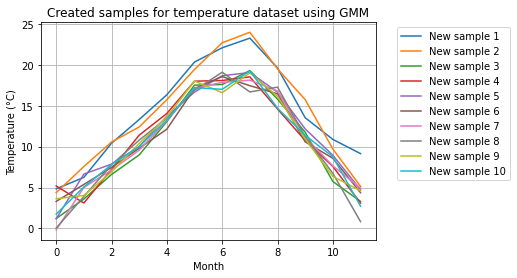

In [47]:
MONTH = [i for i in range(12)]

for i in range(10):
    pl.plot(MONTH, new_samples_temperature[0][i], label=('New sample ' + str(i + 1)))

pl.xlabel("Month")
pl.ylabel("Temperature (°C)")
pl.title("Created samples for temperature dataset using GMM",fontsize=12)
pl.legend(bbox_to_anchor=(1.05, 1))
pl.grid()

The generated samples have the same distribution as the real samples, the temperature values are not outliers. However, there is too much noise in the data and it is easy to differentiate them from the real data. 

##### Digits dataset

<div class="alert alert-block alert-info">
GMM on digits dataset
</div>

In [48]:
clf_GMM_digits = GaussianMixture(3, covariance_type="diag")
clf_GMM_digits.fit(x)


yc_GMM_digits = clf_GMM_digits.predict(x)

# Get estimated parameters
phi_GMM_digits = clf_GMM_digits.weights_
mus_GMM_digits = clf_GMM_digits.means_
Sigmas_GMM_digits = clf_GMM_digits.covariances_

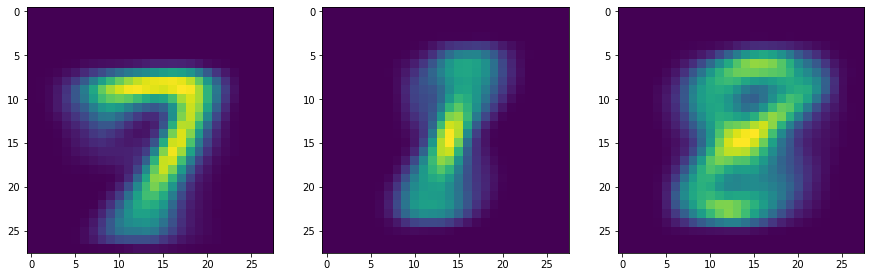

In [49]:
figure, axis = pl.subplots(1, 3, figsize=(15,5)) 
axis[0].imshow((mus_GMM_digits[0]).reshape(28,28))
axis[1].imshow(mus_GMM_digits[1].reshape(28,28))
axis[2].imshow(mus_GMM_digits[2].reshape(28,28))

we can recognize the three starting classes. Compared to the KMean algorithm, I find that the result is less clear. The contours of the numbers are more blurred.

<div class="alert alert-block alert-info">
Test with several values of K
</div>

Test with K=2

In [50]:
clf_GMM_digits_test_k = GaussianMixture(2, covariance_type="diag")
clf_GMM_digits_test_k.fit(x)


yc_GMM_digits_test_k = clf_GMM_digits_test_k.predict(x)

phi_GMM_digits_test_k = clf_GMM_digits_test_k.weights_
mus_GMM_digits_test_k = clf_GMM_digits_test_k.means_
Sigmas_GMM_digits_test_k = clf_GMM_digits_test_k.covariances_

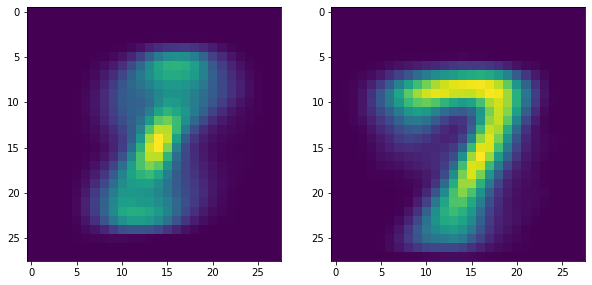

In [51]:
figure, axis = pl.subplots(1, 2, figsize=(10,5)) 
axis[0].imshow(mus_GMM_digits_test_k[0].reshape(28,28))
axis[1].imshow(mus_GMM_digits_test_k[1].reshape(28,28))

As for the KMean, the 1 is confused with the 8.

Test with K=4

In [52]:
clf_GMM_digits_test_k = GaussianMixture(4, covariance_type="diag")
clf_GMM_digits_test_k.fit(x)


yc_GMM_digits_test_k = clf_GMM_digits_test_k.predict(x)

phi_GMM_digits_test_k = clf_GMM_digits_test_k.weights_
mus_GMM_digits_test_k = clf_GMM_digits_test_k.means_
Sigmas_GMM_digits_test_k = clf_GMM_digits_test_k.covariances_

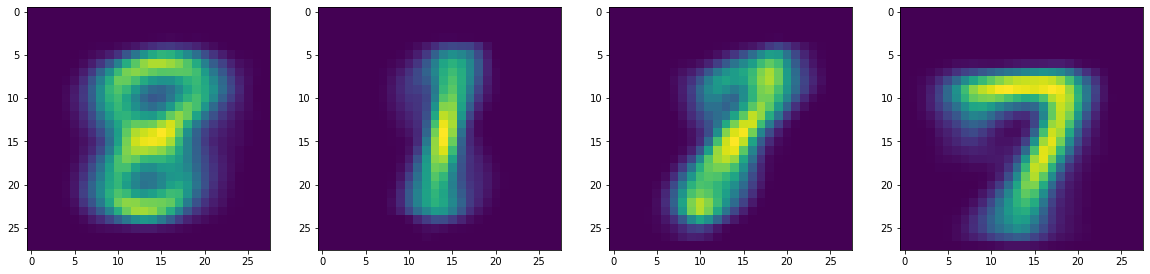

In [53]:
figure, axis = pl.subplots(1, 4, figsize=(20,5)) 
axis[0].imshow(mus_GMM_digits_test_k[0].reshape(28,28))
axis[1].imshow(mus_GMM_digits_test_k[1].reshape(28,28))
axis[2].imshow(mus_GMM_digits_test_k[2].reshape(28,28))
axis[3].imshow(mus_GMM_digits_test_k[3].reshape(28,28))

Here, we recognize the 1, the 7 and the 8. But the new cluster is a mix of 1, 7 and 8.

<div class="alert alert-block alert-info">
Test with different covariance types
</div>

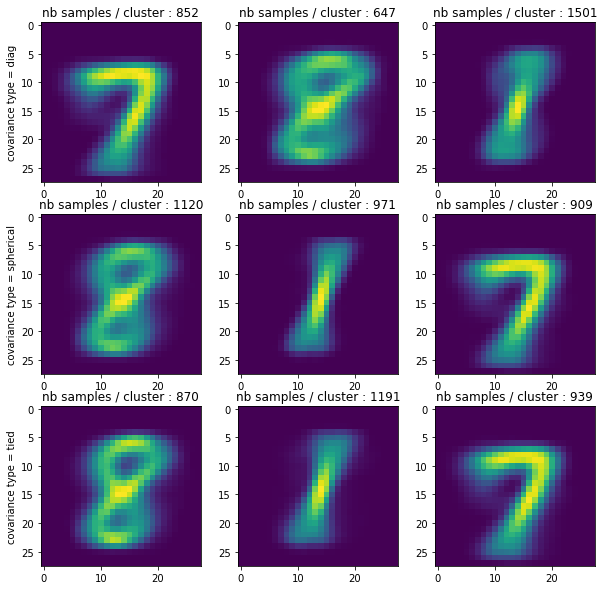

In [54]:
covariance_type = ['diag', 'spherical','tied']
figure, axis = pl.subplots(3, len(covariance_type), figsize=(10,10)) 
for i in range(len(covariance_type)):
    clf_GMM_digits_test_k = GaussianMixture(3, covariance_type=covariance_type[i])
    clf_GMM_digits_test_k.fit(x)
    yc_GMM_digits_test_k = clf_GMM_digits_test_k.predict(x)
    count_per_clusters = np.unique(yc_GMM_digits_test_k, return_counts=True)
    mus_GMM_digits_test_k = clf_GMM_digits_test_k.means_
    Sigmas_GMM_digits_test_k = clf_GMM_digits_test_k.covariances_
    
    axis[i][0].set_ylabel('covariance type = {}'.format(covariance_type[i]))
    for j in range(3):
        axis[i][j].imshow((mus_GMM_digits_test_k[j]).reshape(28,28)) 
        axis[i][j].set_title('nb samples / cluster : {}'.format(count_per_clusters[1][j]))

It is more complicated with a high dimension to observe the variance of the normal distributions found by the algorithm (compared to the temperature dataset). One thing is very different than for the other dataset. This is the fact that depending on the type of covariance, the number of samples found per cluster varies greatly. this is due to the fact that there is much more data in this dataset than in the other. With the Sperical covariance type, we find the most stable number of samples per cluster (about 1000 samples per cluster).

<div class="alert alert-block alert-info">
Find the outliers
</div>

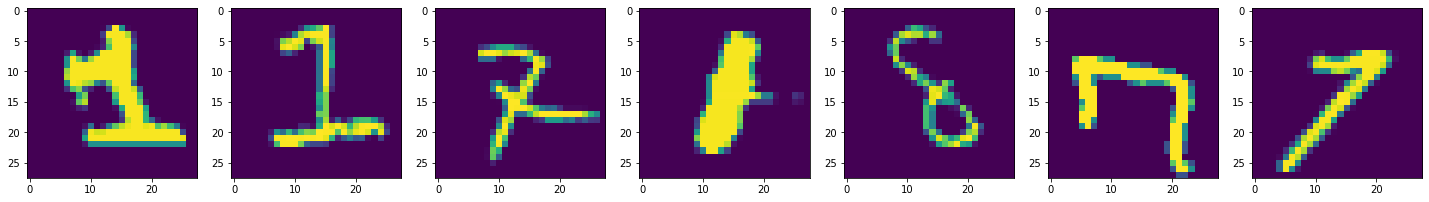

In [55]:
figure, axis = pl.subplots(1, 7, figsize=(25,5)) 
for i in range(7):
    axis[i].imshow(sorted(zip(clf_GMM_digits.score_samples(x), x))[i][1].reshape(28,28))

The outliers found by the algorithm are badly written numbers, some don't even look like numbers.

In [56]:
rand_score(np.reshape(y,(3000)), yc_GMM_digits)

0.7615936423252195

In [57]:
adjusted_rand_score(np.reshape(y,(3000)), yc_GMM_digits)

0.48064532426789625

The results are not as good as with the KMean algorithm.

<div class="alert alert-block alert-info">
Sample generation with GMM 
</div>

In [58]:
new_samples_digits = clf_GMM_digits.sample(5)
new_samples_digits[0].shape

(5, 784)

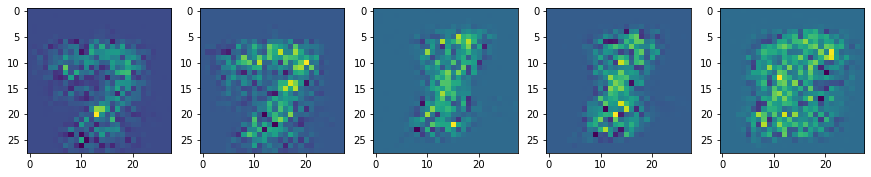

In [59]:
figure, axis = pl.subplots(1, 5,figsize=(15,5)) 
for i in range(5):
    axis[i].imshow(new_samples_digits[0][i].reshape(28,28))

We can guess from very far the shape of numbers. But the result is very disappointing, it will take a more powerful algorithm to generate numbers from the MNIST dataset. 

***

### 4 - Dimensionality reduction

#### 4.1 Linear Projection : Principal Component Analysis

In [60]:
from sklearn.decomposition import PCA
import seaborn as sns

##### Temperature dataset

<div class="alert alert-block alert-info">
Matrice de covariance
</div>

<AxesSubplot:>

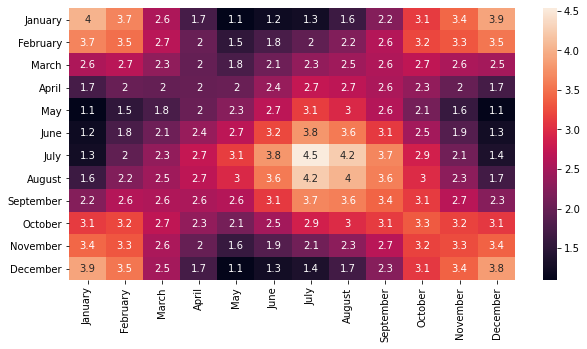

In [61]:
fig = pl.figure(1, figsize=(10, 5))
sns.heatmap(np.cov(x1.T),xticklabels=varname[:-2], yticklabels=varname[:-2], annot=True)

we see that the summer months are very uncorrelated with the winter months.The variance of the month of June is the highest, this means that it is the month of the year where the temperatures between the cities are the most diversified.In contrast, during the month of April of this year the temperatures between the cities were relatively close.

<div class="alert alert-block alert-info">
PCA
</div>

In [62]:
clf_pca_temperature = PCA(n_components=None)
# fit the model and project in 2D
Xp_pca_temperature = clf_pca_temperature.fit_transform(x1)

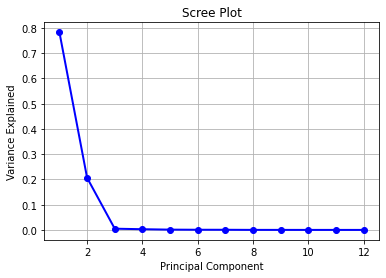

In [63]:
PC_values = np.arange(clf_pca_temperature.n_components_) + 1
pl.plot(PC_values, clf_pca_temperature.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
pl.title('Scree Plot')
pl.grid()
pl.xlabel('Principal Component')
pl.ylabel('Variance Explained')
pl.show()

the curve goes down very quickly, the first two components of the PCA already keep a lot of information from the initial dataset.

In [64]:
100 * (clf_pca_temperature.explained_variance_ratio_[0] + clf_pca_temperature.explained_variance_ratio_[1])

98.96802035903166

Exactly 98.9% of the information of the initial dataset is kept by PC1 and PC2. The 2D visualization of the dataset thanks to the PCA will allow us to understand the dataset.

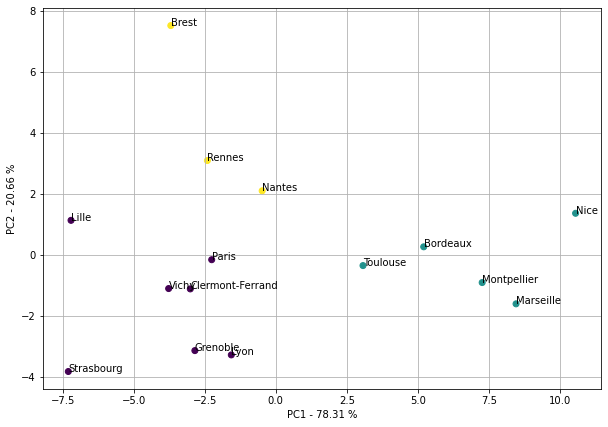

In [65]:
fig = pl.figure(1, figsize=(10, 7))
pl.scatter(Xp_pca_temperature[:,0],Xp_pca_temperature[:,1],c=y_kmeas_temperature)
pl.xlabel('PC1 - {} %'.format(round(clf_pca_temperature.explained_variance_ratio_[0] * 100,2)))
pl.ylabel('PC2 - {} %'.format(round(clf_pca_temperature.explained_variance_ratio_[1] * 100,2)))
for i in range(len(Xp_pca_temperature)):
    pl.text(Xp_pca_temperature[i,0],Xp_pca_temperature[i,1],villes[i])
pl.grid()

We can say that PC2 corresponds to the longitude and PC1 the latitude. Thanks to the PCA on the temperature dataset, we can find a 2D geographical representation of the cities, it is a very interesting result.

We can know much more thanks to this graph. We can, in fact, remove the linear relations that exist between the temperatures of the cities. 

For example, we can say that in terms of temperature, the cities of Paris, Clermond Ferrand and Vichy are very close. Clermond Ferrand is in altitude, it is colder there, that explains why its temperatures are closer to a city further north. On the other hand the city of brest is the most different of all the cities in the dataset.

Finally, I represented the K Means clusters with the colors. KMeans had succeeded in arranging the cities geographically, the PCA also, so we find on the graph the right clusters linked to the right colors.

<div class="alert alert-block alert-info">
Two first dimensions plot
</div>

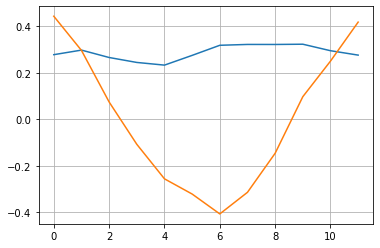

In [66]:
pl.plot(clf_pca_temperature.components_.T[:,:2])
pl.grid()

This graph is very interesting.The constant axis lowers or raises the temperature of the cities. It has an impact on the average temperature of cities. The other axis acts on the difference of temperature of the cities in winter and in summer. It plays on the seasonality. Adding it to a city will make it warmer in winter and colder in winter in that city. It is the opposite effect if you subtract it.

<div class="alert alert-block alert-info">
PCA reconstruction
</div>

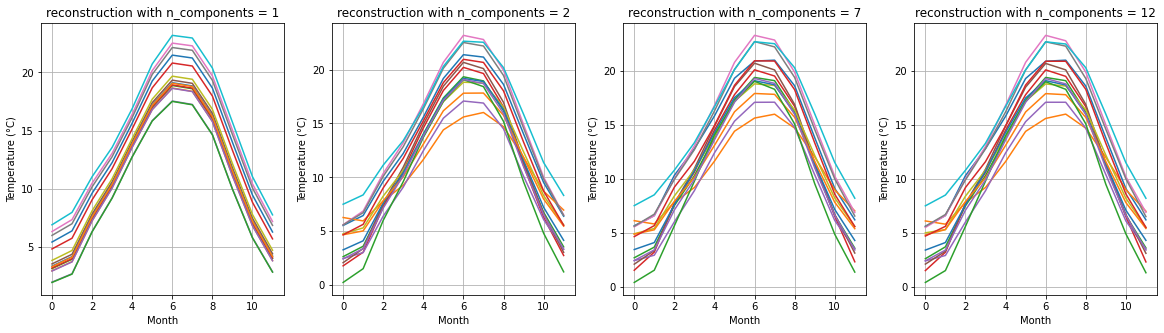

In [67]:
fig, axis = pl.subplots(1, 4, figsize=(20, 5))
components = [1,2,7,12]
for j in range(len(components)):
    clf_pca_temperature = PCA(n_components=components[j])
    Xp_pca_temperature = clf_pca_temperature.fit_transform(x1)
    inversed_pca_temperature = clf_pca_temperature.inverse_transform(Xp_pca_temperature)

    MONTH = [i for i in range(12)]
    for i in range(len(villes)):
        axis[j].plot(MONTH, inversed_pca_temperature[i])

    axis[j].set_xlabel("Month")
    axis[j].set_ylabel("Temperature (°C)")
    axis[j].set_title("reconstruction with n_components = {}".format(components[j]))
    axis[j].grid()

We can see the reconstructions of the PCA data for several values of p.The smaller p is, the smoother the temperature curves are. This is a good example to say that the PCA allows to remove the noise present in a dataset.

##### Digits dataset

<div class="alert alert-block alert-info">
Matrice de covariance
</div>

<AxesSubplot:>

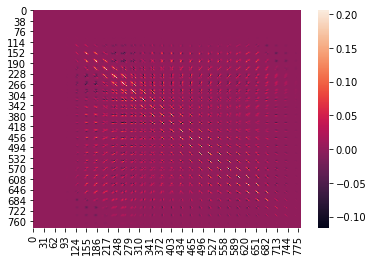

In [68]:
sns.heatmap(np.cov(x.T))

It is a covariance matrix on images. The result is very interesting. We can say that it has this shape because each pixel looks like to its neighbor and of course to itself. The numbers are usually drawn in the center of the image, we find that on this matrix.

In [69]:
clf_pca_digits = PCA(n_components=None)
# fit the model and project in 2D
Xp_pca_digits = clf_pca_digits.fit_transform(x)

# Get the projections/axis P
D_pca_digits = clf_pca_digits.components_.T

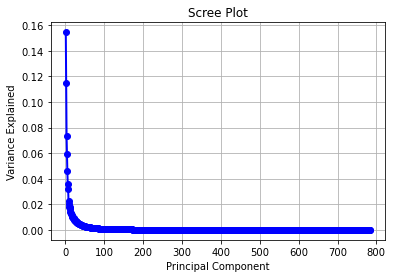

In [70]:
PC_values = np.arange(clf_pca_digits.n_components_) +1
pl.plot(PC_values, clf_pca_digits.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
pl.title('Scree Plot')
pl.grid()
pl.xlabel('Principal Component')
pl.ylabel('Variance Explained')
pl.show()

again the screeplot goes down very fast. But the number of features is higher than before, so the 2D representation will certainly not be as good as for the temperature dataset. 

In [71]:
100 * (clf_pca_digits.explained_variance_ratio_[0] + clf_pca_digits.explained_variance_ratio_[1])

26.95057794431235

26% of the initial infos are kept by PC1 and PC2. 

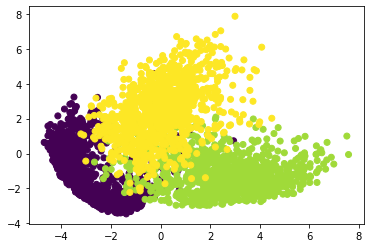

In [72]:
pl.scatter(Xp_pca_digits[:,0],Xp_pca_digits[:,1],c=y)

Colors corresponds to the true classes. Without colors we can say nothing on the PCA graph. But we can note that the PCA represented on 2 dimensions still allows to distinguish the 3 classes 1, 7 and 8. For me this is important, we started from 784 features, we applied the PCA algorithm. Now, only with PC1 and PC2 we distinguish the initial classes. This proves the efficiency of the PCA. 

<div class="alert alert-block alert-info">
Two first dimensions plot
</div>

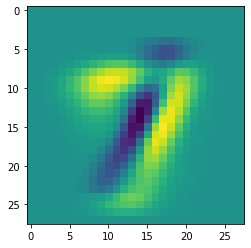

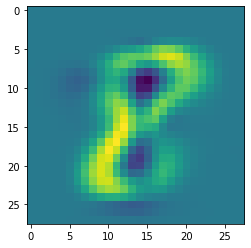

In [73]:
pl.imshow(clf_pca_digits.components_.T[:,0].reshape(28,28))
pl.show()
pl.imshow(clf_pca_digits.components_.T[:,1].reshape(28,28))
pl.show()

The first dimension if added or subtracted can correspond to 7 or 1. The second dimension corresponds to 8 if added and probably to 7 if subtracted (it is difficult to distinguish the number hidden behind the 8).

<div class="alert alert-block alert-info">
PCA reconstruction
</div>

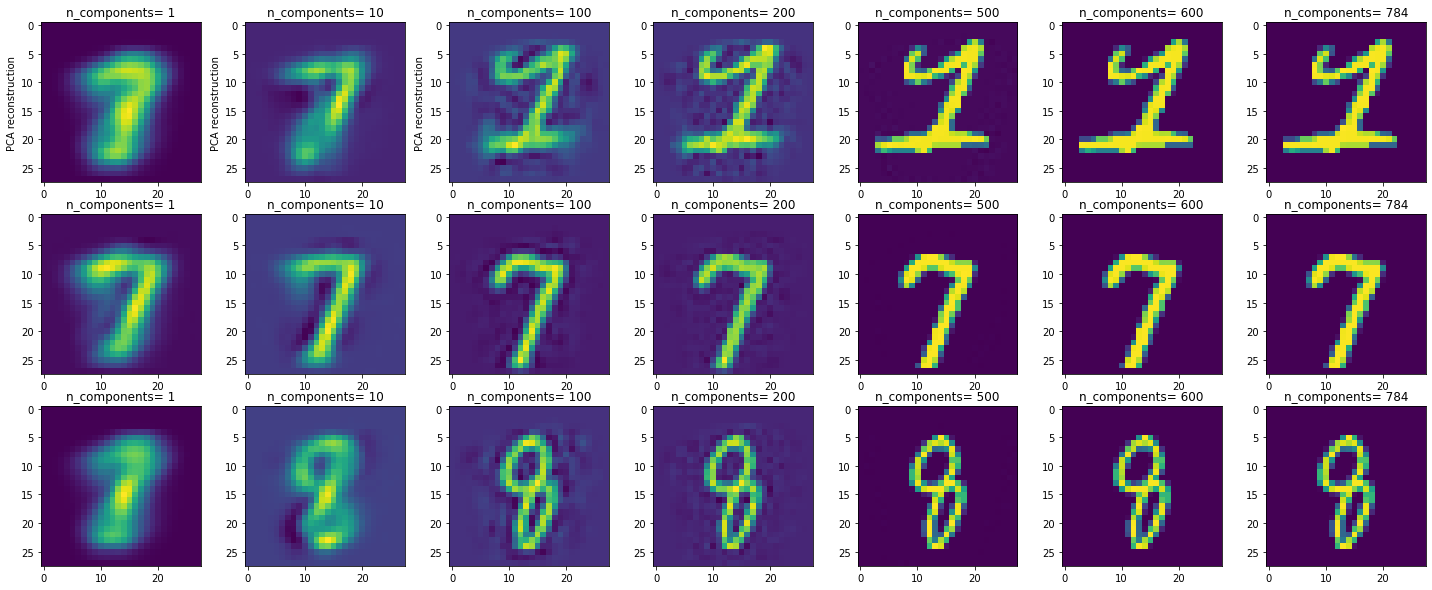

In [74]:
fig, axis = pl.subplots(3, 7, figsize=(25, 10))
components = [1,10,100,200,500,600,784]
ids_digit = [500, 1500, 2500]
for i in range(3):
    for j in range(len(components)):
        clf_pca_digits = PCA(n_components=components[j])
        Xp_pca_digits = clf_pca_digits.fit_transform(x)
        inversed_pca_digits = clf_pca_digits.inverse_transform(Xp_pca_digits)

        axis[i][j].imshow(inversed_pca_digits[ids_digit[i]].reshape(28,28))
        axis[i][j].set_title('n_components= {}'.format(components[j]))
    
    axis[0][i].set_ylabel('PCA reconstruction')

The higher the number of components, the sharper the image during reconstruction. 

PCA can be used as an image compression technique.

#### 4.2 Manifold Learning : TSNE

In [75]:
from sklearn.manifold import TSNE

##### Temperature dataset

In [76]:
def plot_tsne_temperature(perplexity):
    clf_tsne_temperature = TSNE(n_components=2,perplexity=perplexity)
    Xp_tsne_temperture = clf_tsne_temperature.fit_transform(x1)
    
    pl.scatter(Xp_tsne_temperture[:,0],Xp_tsne_temperture[:,1],c=y_kmeas_temperature)
    for i in range(len(Xp_tsne_temperture)):
        pl.text(Xp_tsne_temperture[i,0],Xp_tsne_temperture[i,1],villes[i])
    pl.grid()

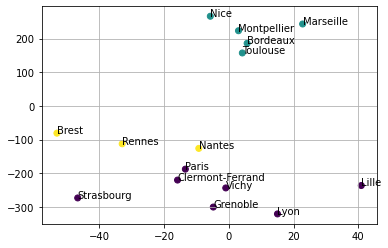

In [77]:
plot_tsne_temperature(3)

The perplexity is related to the number of nearest neighbors. Larger datasets usually require a larger perplexity.

Here, p = 2 is to small.

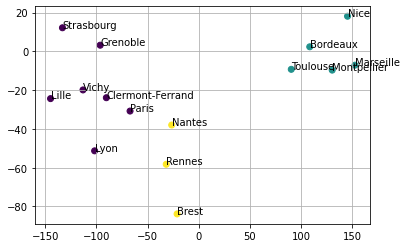

In [78]:
plot_tsne_temperature(4)

p = 4, we distinguish separate clusters. 

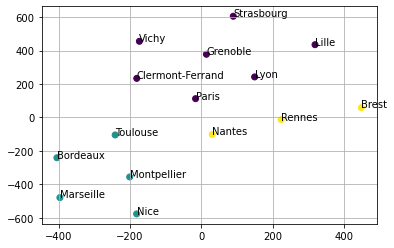

In [79]:
plot_tsne_temperature(10)

Here, p is to high. we can't see nothing. 

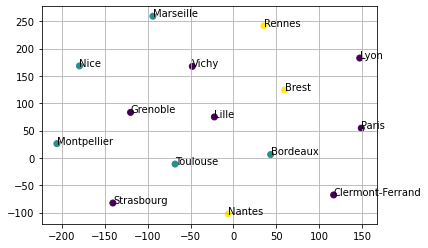

In [80]:
plot_tsne_temperature(15)

It is even worst here, it is normal because p = the number of cities. 

For this dataset, the best value of p seems to be around 4. But the dimension of this dataset is very small, so is it maybe not the best idea to use the tsne algorithm on this data. tsne is known as a tool to visualize high-dimensional data. It will be a perfect tool to visualize the MNIST pictures. 

##### Digits dataset

In [81]:
def plot_tsne_digits(perplexity):
    clf_tsne_digits = TSNE(n_components=2,perplexity=perplexity)
    Xp_tsne_digits = clf_tsne_digits.fit_transform(x)
    pl.scatter(Xp_tsne_digits[:,0],Xp_tsne_digits[:,1],c=y)

Again, we test several values of p. tsne is quite slow so we will not test with very big values of p. 

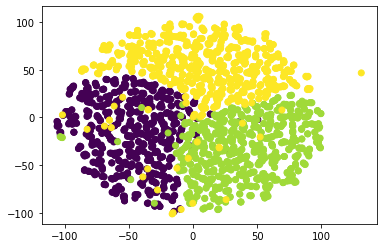

In [82]:
plot_tsne_digits(2)

We can't see nothing.

In [ ]:
plot_tsne_digits(5)

the classes start to separate.

In [ ]:
plot_tsne_digits(15)

In [ ]:
plot_tsne_digits(25)

With p = 25, we clearly distinguish the 3 different classes. We can still try to increase p to see the result.

In [ ]:
plot_tsne_digits(50)

In [ ]:
plot_tsne_digits(100)

In [ ]:
plot_tsne_digits(500)

Classes are starting to come together.

In [ ]:
plot_tsne_digits(1000)

The value of p is extremely important, the results of the algorithm depend on it. p should not be too small or too large.

the tsne algorithm works extremely well on high dimensional data. We could easily have the number of different digits drawn on the images without having access to y_true with this algorithm. 

The tsne algorithm works extremely well on high dimensional data. We could easily have the number of different digits drawn on the images without having access to y_true with this algorithm. 

### 5 Final conclusion

This lab was quite long and very complete. I tried to do my best and I learned a lot.

the most difficult things were for me:
- To understand the algorithms, To understand the results and especially To understand which value to assign to which argument.  
- To interpret the results, this was the most difficult part. It is, I think, the part that requires the most experience in machine learning. It is not difficult to apply a GMM with sklearn, but interpreting the results is much more difficult. Fortunately, I am curious and it was pleasant to try to find interesting information in the algorithm results, especially since the datasets were quite visual. 

I know that I still have to improve a lot in the interpretation of the results. That's also why I like this discipline, there is always something more to analyze in the data. 

Next time I'll try to go faster on the interpretation part because I have the impression to have spent a lot of time on the code and the graphics generation.

On the professional side, I tried to find other use cases on which we could have used the algorithms of this lab :

- Perform a clustering on a client database to segment them and make targeted marketing choices.
- Maybe detecting fraud or anomaly by analyzing the outliers returned by the GMM algorithm. 
- Image compression using PCA: https://towardsdatascience.com/image-compression-using-principal-component-analysis-pca-253f26740a9f
- Make a 2D visualisation of a high dimentional dataset using t-sne.